In [9]:
import pandas as pd
data = pd.read_csv('./training_data_fall2024.csv')

In [10]:
data['increase_stock'] = data['increase_stock'] == 'low_bike_demand'

In [ ]:
data[]

,hour_of_day,day_of_week,month,holiday,weekday,summertime,temp,dew,humidity,precip,snowdepth,windspeed,cloudcover,visibility,increase_stock
0,5,5,1,0,0,0,-7.2,-15.0,53.68,0.000,0.0,16.3,31.6,16.0,True
1,21,4,1,0,1,0,-1.3,-12.8,40.97,0.000,0.0,23.9,85.7,16.0,True
2,21,3,8,0,1,1,26.9,21.8,73.39,0.000,0.0,0.0,81.1,16.0,True
3,1,6,1,0,0,0,3.1,-4.0,59.74,0.000,0.0,19.2,0.0,16.0,True
4,17,0,3,0,1,0,11.7,-11.4,18.71,0.000,0.0,10.5,44.6,16.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,3,5,6,0,0,1,21.5,19.4,87.68,0.000,0.0,10.6,24.4,16.0,True
1596,14,0,6,0,1,1,23.2,20.1,82.43,2.217,0.0,9.8,92.1,10.4,True
1597,13,0,3,0,1,1,13.9,-2.2,32.93,0.000,2.0,18.2,79.3,16.0,True
1598,14,5,3,0,0,1,11.7,-9.3,22.09,0.000,0.0,5.8,24.4,16.0,False


In [24]:
data.drop(columns=['snow'], inplace=True)

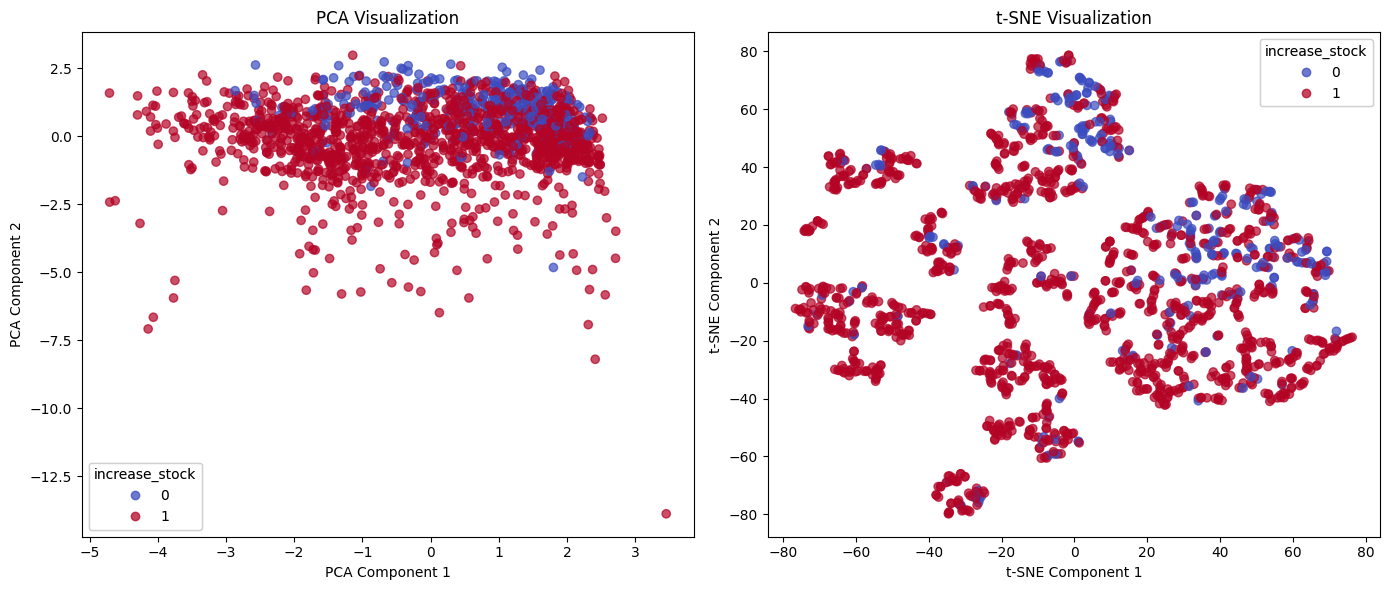

In [27]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

def visualize_tsne_pca(dataframe, label_column='increase_stock'):
    """
    Visualize a DataFrame using both t-SNE and PCA, with coloring based on labels.

    Parameters:
        dataframe (pd.DataFrame): The input DataFrame to visualize.
        label_column (str): The label column to use for coloring (binary: True/False).

    Returns:
        None (plots the PCA and t-SNE visualizations).
    """
    # Separate features and labels
    data = dataframe.drop(columns=[label_column], errors='ignore')
    labels = dataframe[label_column].astype(int)  # Convert labels to integers for plotting

    # Ensure all features are numeric
    data = data.select_dtypes(include=[np.number])

    # Standardize the data
    scaler = StandardScaler()
    normalized_data = scaler.fit_transform(data)

    # PCA Visualization
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(normalized_data)

    # t-SNE Visualization
    tsne = TSNE(n_components=2, perplexity=10, random_state=42)
    tsne_result = tsne.fit_transform(normalized_data)

    # Create subplots for both visualizations
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # PCA plot
    scatter1 = axes[0].scatter(pca_result[:, 0], pca_result[:, 1], c=labels, cmap='coolwarm', alpha=0.7)
    axes[0].set_title('PCA Visualization')
    axes[0].set_xlabel('PCA Component 1')
    axes[0].set_ylabel('PCA Component 2')
    legend1 = axes[0].legend(*scatter1.legend_elements(), title=label_column)
    axes[0].add_artist(legend1)

    # t-SNE plot
    scatter2 = axes[1].scatter(tsne_result[:, 0], tsne_result[:, 1], c=labels, cmap='coolwarm', alpha=0.7)
    axes[1].set_title('t-SNE Visualization')
    axes[1].set_xlabel('t-SNE Component 1')
    axes[1].set_ylabel('t-SNE Component 2')
    legend2 = axes[1].legend(*scatter2.legend_elements(), title=label_column)
    axes[1].add_artist(legend2)

    plt.tight_layout()
    plt.show()


visualize_tsne_pca(data)

Input:
    numpy.array of size (n, 14)

Solution format:
```python
class Method:
    def __init__(self, **kwargs):
        pass

    def predict(self, input: np.array) -> bool:
        pass
    
    def fit(self, input: np.array, output: np.array[bool]) -> None:
        pass
```

Implementation:
    0. Dataset class construction (Vinh)
    1. LDA and QDA (Wang)
    2. XGBoost -> Decision tree algorithm -> AdaMax (Vinh)
    3. SVM -> support vector machine (Thantzin)
    4. Gaussian Processes (Laheeq)

Report:
    0. Create the document using NeurIPS format


In [4]:
from data import BikeDemandDataset

train_dataset = BikeDemandDataset('training_data_fall2024.csv', data_type='train') # get the train split
# val_dataset = BikeDemandDataset('path_to_file.csv', data_type='validation') # get the validation split

for i in train_dataset:
    print('feature: ', i[0].shape) # Output is a numpy array
    print('label: ', i[1].shape) # Output is a numpy array
    break

feature:  torch.Size([15])
label:  torch.Size([])
